<a href="https://colab.research.google.com/github/Nittany-Data-Labs/Data-Crawl/blob/main/DataCrawl_Answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Answer Key
Remember there is normally multiple ways to program something. This key is just one way to get the answers. If you did something a different way, it can still be correct.

Important steps to remember when pursuing data science:
* Always summarize the data before getting started. Understanding the structure of the data is important. You should also ask yourself why/how was this data collected.
* Get a firm understanding of what is being asked. If you do not understand, ask follow-up questions.
* Communicate your findings. As data scientists you will work with technical and non-technical individuals so make sure you translate your findings appropriately. Data visualizations can help with this process.


[Link to Starter Code](https://github.com/Nittany-Data-Labs/Data-Crawl/blob/main/DataCrawl.ipynb)

# State College Data Crawl
Hosted by Nittany Data Labs

## Background
As we all know State College, PA is a college town. We wanted to take a look at the bars downtown.

Here's our assumptions when determining the bars to include:
* The Tavern (40.7956, -77.8597) represents what we are considering to be the center of downtown
* We included all bars within 0.7 km of the center location
* The location must have the tag of "bar" on Google Maps, as of September 18th

To see how we scraped the data from Google Maps, check out on [Github](https://github.com/Nittany-Data-Labs/Data-Crawl/blob/main/DataCrawl_Data.ipynb)

# Packages

In [1]:
!pip install geopandas;
!pip install chart-studio;
!pip install python-tsp;

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 2.2 MB/s 
     |████████████████████████████████| 16.7 MB 52.1 MB/s 
     |████████████████████████████████| 6.3 MB 35.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.3 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=d60c32be40d138d56c9f8e4f0c952b0fb89b834abfab817c093c5353cfabbf39
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Succes

In [2]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

#making map
import chart_studio
import chart_studio.plotly as py
import plotly.figure_factory as ff
import chart_studio.tools as tl
import plotly.graph_objs as go

#TSP
from python_tsp.exact import solve_tsp_dynamic_programming

## Import Data
Note: when importing data from GitHub as a url, make sure you select "Raw" before copying the URL



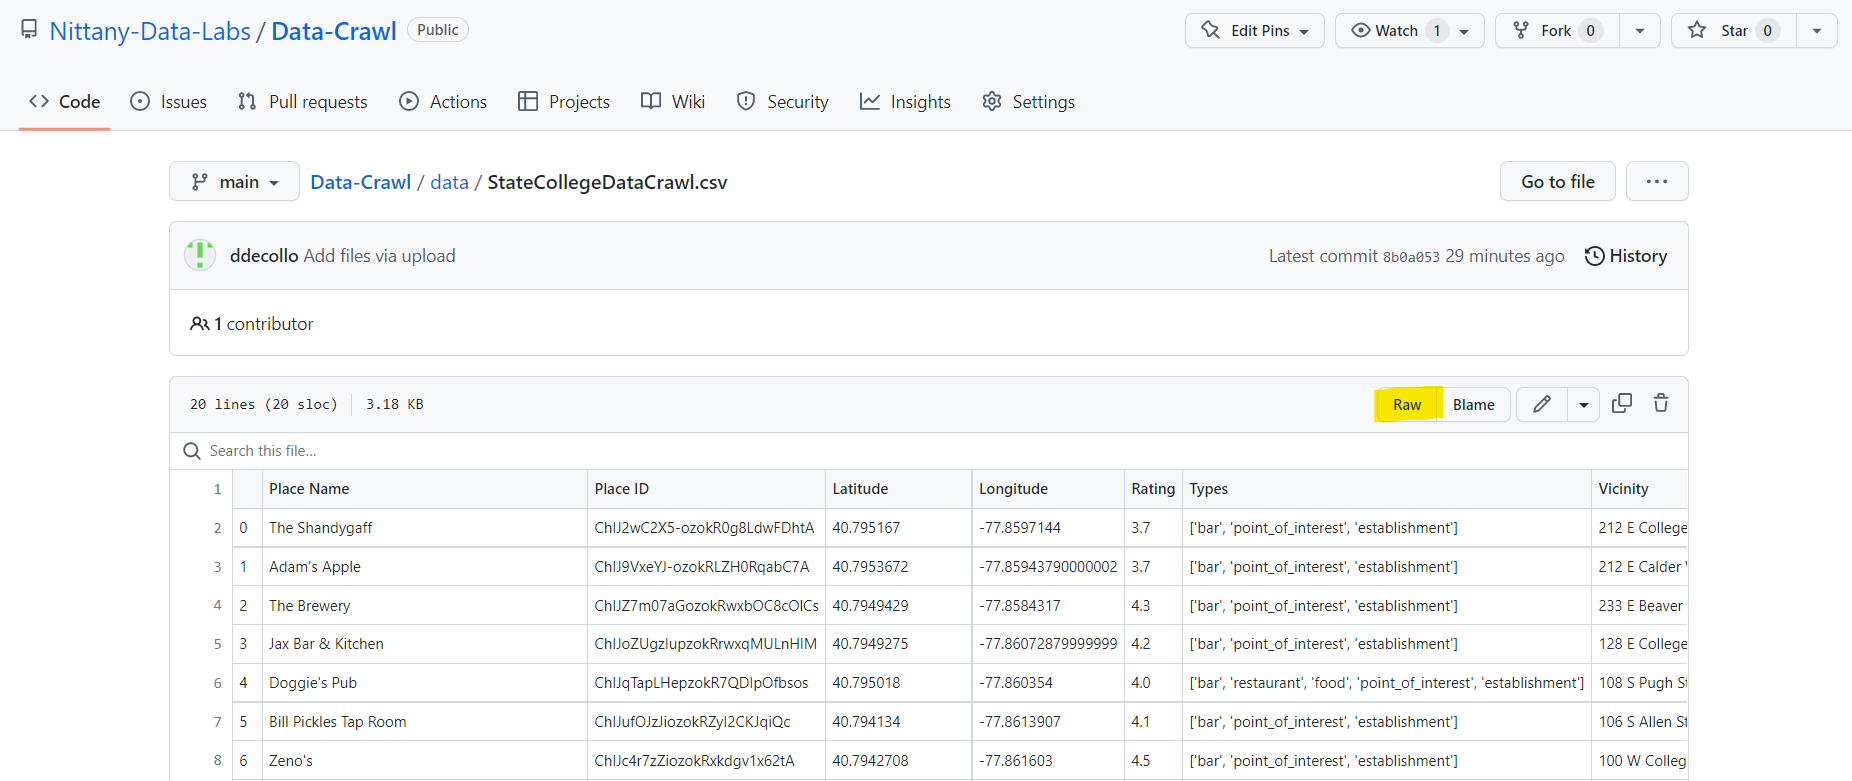

In [3]:
#import from NDL's github
distance_matrix = pd.read_csv('https://raw.githubusercontent.com/Nittany-Data-Labs/Data-Crawl/main/data/DataCrawlDistanceMatrix.csv', header=1, index_col=0)
bar_general = pd.read_csv('https://raw.githubusercontent.com/Nittany-Data-Labs/Data-Crawl/main/data/StateCollegeDataCrawl.csv', index_col=0)

In [4]:
#add coordinates column to bar_general for mapping
bar_general['coordinates'] = list(zip(bar_general['Longitude'], bar_general['Latitude']))
bar_general['coordinates'] = bar_general['coordinates'].apply(Point)

## Understanding the Data
In general you should be asking:
* What is the size of my dataset(s)?
* What type of data am I working with?
* How do my datasets relate to eachother?
* Do I need to clean my data?

### Understanding bar_general

In [5]:
#what does the data look like?
bar_general             #returns the whole df
bar_general.head()      #returns first 5 rows
bar_general.head(1)     #returns first entry
bar_general.tail()      #returns last 5 rows

,Place Name,Place ID,Latitude,Longitude,Rating,Types,Vicinity,coordinates
14,Primanti Bros. Restaurant and Bar State College,ChIJi53GwnBoSogR34J5rnskSFk,40.796702,-77.857185,4.1,"['bar', 'restaurant', 'food', 'point_of_intere...","130 Hiester St, State College",POINT (-77.8571846 40.79670220000001)
15,The Saloon,ChIJmUx6RKCozokR3lSO8lGUe1o,40.797388,-77.857467,3.3,"['night_club', 'point_of_interest', 'establish...","101 Hiester St, State College",POINT (-77.8574666 40.7973876)
16,Social Food + Drink,ChIJgYRmkF6pzokR6Gm7t-EIIm4,40.794463,-77.859141,4.4,"['restaurant', 'food', 'point_of_interest', 'e...","201 E Beaver Ave, State College",POINT (-77.8591412 40.7944633)
17,The Corner Room,ChIJc4r7zZiozokR-NiM1lWNeLg,40.794272,-77.861607,4.2,"['bar', 'restaurant', 'food', 'point_of_intere...","100 W College Ave, State College",POINT (-77.86160670000001 40.7942719)
18,Allen Street Grill,ChIJc4r7zZiozokRsADin-_eEOY,40.794116,-77.861581,4.1,"['restaurant', 'food', 'point_of_interest', 'e...","100 W College Ave, State College",POINT (-77.86158089999999 40.7941163)


In [6]:
#summarize df:
bar_general.shape       #returns the number of rows and columns for the df
bar_general.ndim        #number of dimensions (x & y)
bar_general.count()     #column names with number of rows
bar_general.dtypes      #data types for each column
bar_general.info()      #combination of count and dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 18
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place Name   19 non-null     object 
 1   Place ID     19 non-null     object 
 2   Latitude     19 non-null     float64
 3   Longitude    19 non-null     float64
 4   Rating       19 non-null     float64
 5   Types        19 non-null     object 
 6   Vicinity     19 non-null     object 
 7   coordinates  19 non-null     object 
dtypes: float64(3), object(5)
memory usage: 1.3+ KB


In [7]:
bar_general.describe()  #returns differnt statistics for numeric data

,Latitude,Longitude,Rating
count,19.000000,19.000000,19.000000
mean,40.794891,-77.859925,4.068421
std,0.001185,0.001470,0.307413
min,40.793623,-77.861807,3.300000
25%,40.794118,-77.861060,3.900000
50%,40.794463,-77.860145,4.100000
75%,40.795267,-77.859290,4.250000
max,40.797492,-77.857185,4.500000


**Is 'describe' useful for the data we're working with?**

In [8]:
# do you need to rename any of the columns?
bar_general.columns     #returns column names

Index(['Place Name', 'Place ID', 'Latitude', 'Longitude', 'Rating', 'Types',
       'Vicinity', 'coordinates'],
      dtype='object')

### Understanding distance_matrix
[What is a distance matrix](https://www.displayr.com/what-is-a-distance-matrix/)

In [9]:
distance_matrix

,Unnamed: 1,The Shandygaff,Adam's Apple,The Brewery,Jax Bar & Kitchen,Doggie's Pub,Bill Pickles Tap Room,Zeno's,Local Whiskey,Phyrst,Champs Downtown,The Tavern,Central Reservation,Chumley's,Alla Spina at HiWay,Primanti Bros. Restaurant and Bar State College,The Saloon,Social Food + Drink,The Corner Room,Allen Street Grill
0,,,,,,,,,,,,,,,,,,,,
1,The Shandygaff,0,40,135,88,89,219,271,250,252,244,88,269,291,360,318,344,162,267,273
2,Adam's Apple,40,0,95,128,130,259,307,252,254,284,88,271,327,363,318,347,138,303,309
3,The Brewery,135,95,0,219,220,351,402,194,196,275,182,213,422,420,297,404,80,398,404
4,Jax Bar & Kitchen,88,128,219,0,1,196,183,227,229,221,94,246,203,386,406,371,139,179,185
5,Doggie's Pub,89,130,220,1,0,201,182,228,230,222,93,247,201,385,407,369,140,178,184
6,Bill Pickles Tap Room,219,259,351,196,197,0,51,157,155,76,239,138,71,531,537,516,271,47,53
7,Zeno's,271,307,402,183,182,51,0,208,206,127,220,189,20,512,585,496,321,4,2
8,Local Whiskey,250,252,194,227,228,157,208,0,2,81,321,19,228,614,492,598,114,204,210
9,Phyrst,252,254,196,229,230,155,206,2,0,79,323,17,226,616,494,600,116,202,208


## Map your data points
Create a map to help visualize the locations you're working with

[Tutorial](https://github.com/Nittany-Data-Labs/Data-Crawl/blob/main/StateCollegeMap.ipynb)

In [10]:
#geo dataframe can also be used
gdf = gpd.GeoDataFrame(bar_general, geometry="coordinates")

Use the Tutorial from above to create a map. This does not use the gdf dataframe

In [56]:
# Change API key for Plotly 
def map_credentials():
  # Change API key for Plotly 
  tl.set_credentials_file(username='',      #Insert Plot.ly username <-----------
                          api_key='')       #Insert Plot.ly api key <-----------

  # Add Mapbox access token here 
  mapbox_access_token = ''      #Insert Mapbox Default public token <-----------

  return tl.set_credentials_file, mapbox_access_token

In [12]:
def create_map(site_lat, site_lon, locations_name):
  #get credentials
  tl.set_credentials_file, mapbox_access_token = map_credentials()

  # Generate the data for the map 
  data = [
      go.Scattermapbox(
          lat=site_lat,
          lon=site_lon,
          mode='markers',
          marker=dict(
              size=8,
              color='rgb(255, 0, 0)',
              opacity=1.0
          ),
          hovertext = locations_name
      )]

  layout = go.Layout(
      title='State College Bars',
      autosize=True,
      hovermode='closest',
      showlegend=False,
      mapbox=dict(
          accesstoken=mapbox_access_token,
          bearing=0,
          center=dict(
              lat=40.7956,
              lon=-77.8597
          ),
          pitch=0,
          zoom=15,
          style='dark'
      ),
  )

  fig = dict(data=data, layout=layout)
  return py.iplot(fig, filename='State College Bars')

#put lat, lon, and name into function
create_map(bar_general.Latitude, bar_general.Longitude , bar_general['Place Name'])

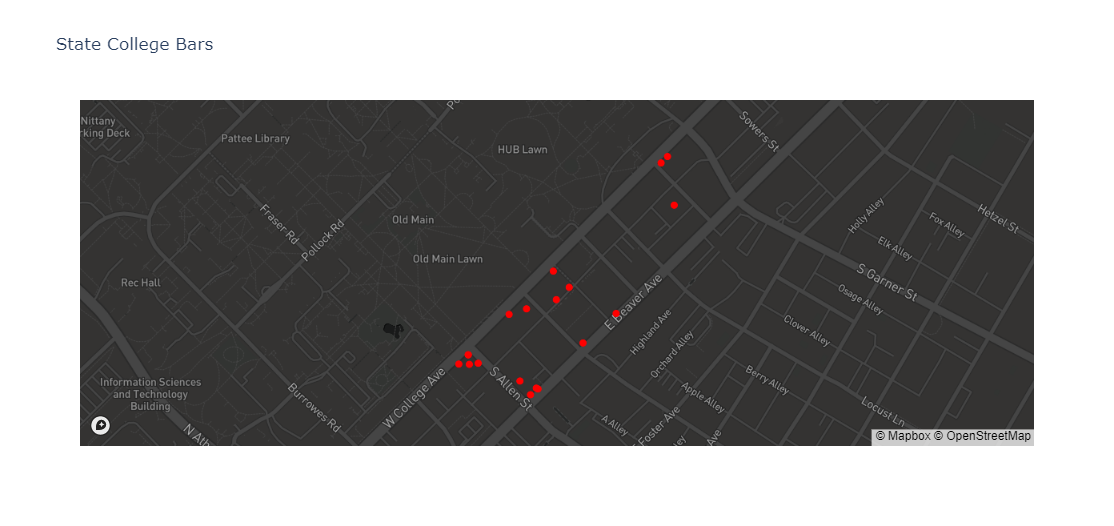

# Challenge 1 - Exploring the Streets:
Take a look at the streets included in our datasets, for example E College Ave, S Pugh St, etc.
   
Create a dataframe with:
* street name
* number of bars for each street
* sum of bar rating for the street
* average bar rating for the street

In [13]:
#look at the top row for column names and variable formats
bar_general.head(1)

,Place Name,Place ID,Latitude,Longitude,Rating,Types,Vicinity,coordinates
0,The Shandygaff,ChIJ2wC2X5-ozokR0g8LdwFDhtA,40.795167,-77.859714,3.7,"['bar', 'point_of_interest', 'establishment']","212 E College Ave, State College",POINT (-77.85971 40.79517)


### Get Street Name
Use the split function to remove the city and street number. 
1.   Split at comma: 

 Example:
 * '212 E College Ave, State College' -> ['212 E College Ave', 'State College']
2.   Look at the first element in the list with List[0]
3. Split that element at the spaces

 Example:
 * '212 E College Ave' -> ['212', 'E', 'College', 'Ave']
4. Combine all non-numeric items with a space inbetween each element as a string

 Example:
 * ['212', 'E', 'College', 'Ave'] -> 'E College Ave'
5. Add the results to a list
6. Create a column named 'Street' in our existing dataframe with our list


 **Will this work for locations that are not in State College?**

In [14]:
streets = []                          #empty list
for i in bar_general['Vicinity']:
  street_split = i.split(',')         #split by comma
  street_num = street_split[0]        #the city is removed
  temp = street_num.split()           #split by space
  streets.append(' '.join(x for x in temp if not x.isdigit()) )   #join with a space if it is not a number
bar_general['Street'] = streets       #add street column to df
bar_general                           #the new column is the last column in the df

,Place Name,Place ID,Latitude,Longitude,Rating,Types,Vicinity,coordinates,Street
0,The Shandygaff,ChIJ2wC2X5-ozokR0g8LdwFDhtA,40.795167,-77.859714,3.7,"['bar', 'point_of_interest', 'establishment']","212 E College Ave, State College",POINT (-77.85971 40.79517),E College Ave
1,Adam's Apple,ChIJ9VxeYJ-ozokRLZH0RqabC7A,40.795367,-77.859438,3.7,"['bar', 'point_of_interest', 'establishment']","212 E Calder Way, State College",POINT (-77.85944 40.79537),E Calder Way
2,The Brewery,ChIJZ7m07aGozokRwxbOC8cOlCs,40.794943,-77.858432,4.3,"['bar', 'point_of_interest', 'establishment']","233 E Beaver Ave, State College",POINT (-77.85843 40.79494),E Beaver Ave
3,Jax Bar & Kitchen,ChIJoZUgzIupzokRrwxqMULnHIM,40.794928,-77.860729,4.2,"['bar', 'point_of_interest', 'establishment']","128 E College Ave, State College",POINT (-77.86073 40.79493),E College Ave
4,Doggie's Pub,ChIJqTapLHepzokR7QDIpOfbsos,40.795018,-77.860354,4.0,"['bar', 'restaurant', 'food', 'point_of_intere...","108 S Pugh St, State College",POINT (-77.86035 40.79502),S Pugh St
5,Bill Pickles Tap Room,ChIJufOJzJiozokRZyI2CKJqiQc,40.794134,-77.861391,4.1,"['bar', 'point_of_interest', 'establishment']","106 S Allen St, State College",POINT (-77.86139 40.79413),S Allen St
6,Zeno's,ChIJc4r7zZiozokRxkdgv1x62tA,40.794271,-77.861603,4.5,"['bar', 'point_of_interest', 'establishment']","100 W College Ave, State College",POINT (-77.86160 40.79427),W College Ave
7,Local Whiskey,ChIJuwJ5r5iozokRkBDMex98ww0,40.793730,-77.860145,4.4,"['bar', 'restaurant', 'food', 'point_of_intere...","107 E Beaver Ave, State College",POINT (-77.86014 40.79373),E Beaver Ave
8,Phyrst,ChIJc8UbpZiozokRXReoAANZT7g,40.793717,-77.860107,3.9,"['bar', 'restaurant', 'food', 'point_of_intere...","111 E Beaver Ave, State College",POINT (-77.86011 40.79372),E Beaver Ave
9,Champs Downtown,ChIJEesCsZiozokRZis9bSTBHtU,40.793845,-77.860495,4.2,"['bar', 'restaurant', 'food', 'point_of_intere...","139 S Allen St, State College",POINT (-77.86049 40.79384),S Allen St


### Groupby and Aggregation
[Helpful Guide](https://pbpython.com/groupby-agg.html) 

In [15]:
street_df = bar_general.groupby('Street')['Rating'].agg('describe')
#print(street_df)                 #print this to find out what's included in agg('describe')
street_df = street_df[['count', 'mean', 'min', 'max']]              #only keep these 4 columns
street_df['total'] = street_df['count'] * street_df['mean']         #add new column

In [16]:
#sort df
street_df = street_df.sort_values('count')
street_df

,count,mean,min,max,total
Street,,,,,
E Calder Way,1.0,3.700,3.7,3.7,3.7
S Pugh St,1.0,4.000,4.0,4.0,4.0
Hiester St,2.0,3.700,3.3,4.1,7.4
S Allen St,2.0,4.150,4.1,4.2,8.3
E College Ave,4.0,4.000,3.7,4.2,16.0
W College Ave,4.0,4.125,3.7,4.5,16.5
E Beaver Ave,5.0,4.280,3.9,4.4,21.4


## Visual
Create a visual that you feel best represents the streets dataframe you 

### State College Bar Chart

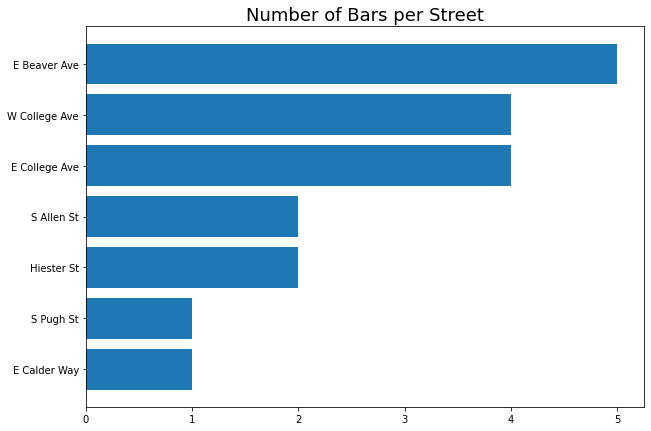

In [17]:
# Figure Size
fig = plt.figure(figsize =(10, 7))

# Horizontal Bar Plot
#plt.barh(street_df.index, street_df['count'])
plt.barh(street_df.index, 'count', data = street_df)

#add title
plt.title("Number of Bars per Street", size=18)

# Show Plot
plt.show()

#save image
#plt.savefig("StateCollegeBarChart.png")

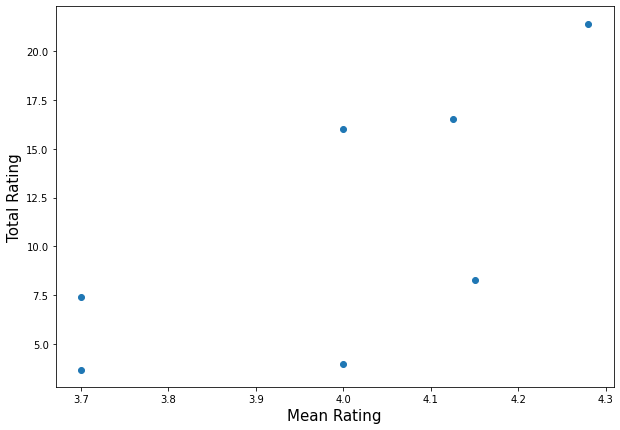

In [18]:
# Figure Size
fig = plt.figure(figsize =(10, 7))

# Horizontal Bar Plot
plt.scatter(street_df['mean'], street_df['total'])

#axis label
plt.xlabel("Mean Rating", size=15)
plt.ylabel("Total Rating", size=15)

# Show Plot
plt.show()

## Summary
E Beaver Ave has the most bars, highest mean rating, and highest total 

# Challenge 2 - Bar Crawl:
After a long week you and your friends do not want to walk further than neccessary. What is the most efficient path for you to visit all of the bars in downtown State College?

**Hint**: Think of this problem from a different perspective.
You are a **[TRAVELING SALESMAN](https://developers.google.com/optimization/routing/tsp)** trying to sell paper products to all of the bars in State College. What is your most efficient path to get to all of the bars in downtown State College?

[Source](https://github.com/fillipe-gsm/python-tsp)

## Distance Matrix
Need to clean up original distance matrix so it is functional

In [19]:
bar_names = list(bar_general['Place Name'])

dis_matrix = []       #create distance matrix
bars_distance = {}    #create dictionary with distances

for i in bar_names:
  list1 = []
  for j in distance_matrix[i]:
    list1.append(j)
  dis_matrix.append(list1)
  bars_distance[i] = list1

dis_matrix = np.array(dis_matrix)

## TSP

In [20]:
#basic TSP (return to start)
permutation, distance = solve_tsp_dynamic_programming(dis_matrix)
print(permutation, distance)

#convert column numbers to their names
order = []
for i in permutation:
  order.append(bar_names[i])

if len(order) == len(bar_names):
  print(order, distance)
else:
  print("Failed")

[0, 1, 10, 13, 15, 14, 2, 16, 7, 8, 11, 9, 5, 17, 6, 18, 12, 4, 3] 1552
['The Shandygaff', "Adam's Apple", 'The Tavern', 'Alla Spina at HiWay', 'The Saloon', 'Primanti Bros. Restaurant and Bar State College', 'The Brewery', 'Social Food + Drink', 'Local Whiskey', 'Phyrst', 'Central Reservation', 'Champs Downtown', 'Bill Pickles Tap Room', 'The Corner Room', "Zeno's", 'Allen Street Grill', "Chumley's", "Doggie's Pub", 'Jax Bar & Kitchen'] 1552


## Open TSP
Unlike TSP, Open TSP does not have to return to the start. This is the type of path you would use for a bar crawl. TSP is like a round-trip travel plan and Open TSP is like a one-way travel plan.

In [21]:
#open TSP (does not return to start)
dis_matrix[:, 0] = 0
permutation2, open_distance = solve_tsp_dynamic_programming(dis_matrix)
print(permutation2)

#convert column numbers to their names
open_order = []
for i in permutation2:
  open_order.append(bar_names[i])

if len(open_order) == len(bar_names):
  print(open_order, open_distance)       #distance is in meters
else:
  print("Failed")

[0, 1, 10, 3, 4, 12, 18, 6, 17, 5, 9, 11, 8, 7, 16, 2, 14, 15, 13]
['The Shandygaff', "Adam's Apple", 'The Tavern', 'Jax Bar & Kitchen', "Doggie's Pub", "Chumley's", 'Allen Street Grill', "Zeno's", 'The Corner Room', 'Bill Pickles Tap Room', 'Champs Downtown', 'Central Reservation', 'Phyrst', 'Local Whiskey', 'Social Food + Drink', 'The Brewery', 'Primanti Bros. Restaurant and Bar State College', 'The Saloon', 'Alla Spina at HiWay'] 1266


## Visual
Create a map of the best path

### Sort Dataframe
First we have to put our df in the correct order.

In [22]:
def create_tsp_df(order, bar_general = bar_general):
  tsp_df = bar_general[['Place Name','Latitude', 'Longitude']]
  temp = pd.DataFrame({'Place Name':order, 'order':range(0, len(order))})

  tsp_df = pd.merge(tsp_df, temp, on='Place Name')
  #sort df by order and reindex so the values match order
  tsp_df = tsp_df.sort_values('order').reset_index(drop=True) 
  return tsp_df
  #temp

tsp_df = create_tsp_df(order)
tsp_df
open_tsp_df = create_tsp_df(open_order)
open_tsp_df

,Place Name,Latitude,Longitude,order
0,The Shandygaff,40.795167,-77.859714,0
1,Adam's Apple,40.795367,-77.859438,1
2,The Tavern,40.795630,-77.859778,2
3,Jax Bar & Kitchen,40.794928,-77.860729,3
4,Doggie's Pub,40.795018,-77.860354,4
5,Chumley's,40.794120,-77.861807,5
6,Allen Street Grill,40.794116,-77.861581,6
7,Zeno's,40.794271,-77.861603,7
8,The Corner Room,40.794272,-77.861607,8
9,Bill Pickles Tap Room,40.794134,-77.861391,9


### Create TSP Map function

In [23]:
def tsp_map(order, bar_general = bar_general):
  #get credentials
  tl.set_credentials_file, mapbox_access_token = map_credentials()
  
  #get tsp dataframe
  tsp_df = create_tsp_df(order, bar_general = bar_general)

  # Save latitude and longitude as variables.
  site_lat = tsp_df.Latitude
  site_lon = tsp_df.Longitude
  locations_name = tsp_df['Place Name']
  order_lst = tsp_df['order']

  # Generate the data for the map 
  data = [
      go.Scattermapbox(
          lat=site_lat,
          lon=site_lon,
          mode='markers+lines',
          marker=dict(
              size=8,
              #color='rgb(242, 177, 172)',
              opacity=0.8, 
              color = order_lst
          ),
          hovertext = locations_name
      )]


  layout = go.Layout(
      title='State College Bars',
      autosize=True,
      hovermode='closest',
      showlegend=False,
      mapbox=dict(
          accesstoken=mapbox_access_token,
          bearing=0,
          center=dict(
              lat=40.7956,
              lon=-77.8597
          ),
          pitch=0,
          zoom=15,
          style='light'
      ),
  )

  fig = dict(data=data, layout=layout)
  return py.iplot(fig, filename='State College Bars - Open TSP')

### TSP MAP

In [24]:
tsp_map(order)

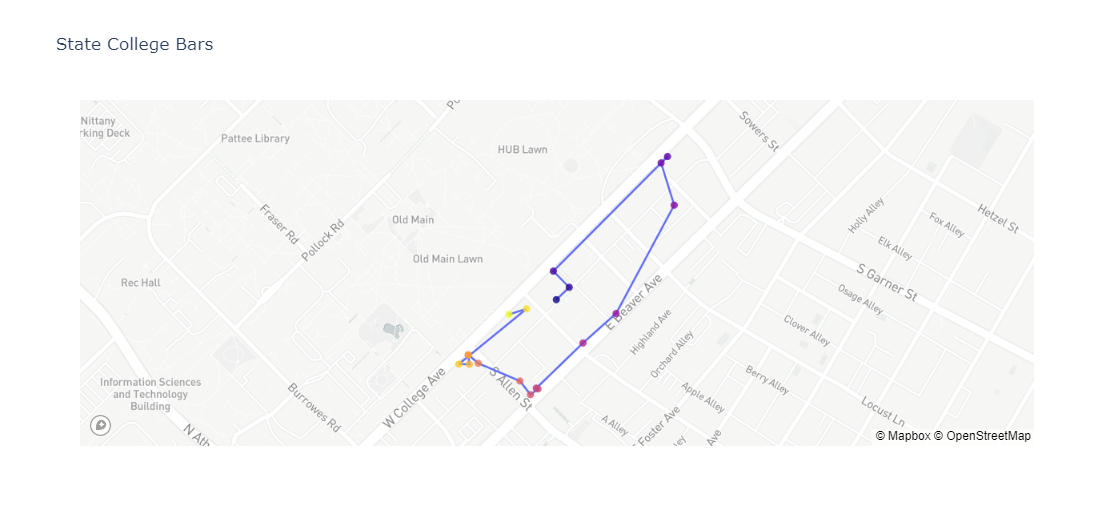

### Open TSP Map

In [25]:
tsp_map(open_order)

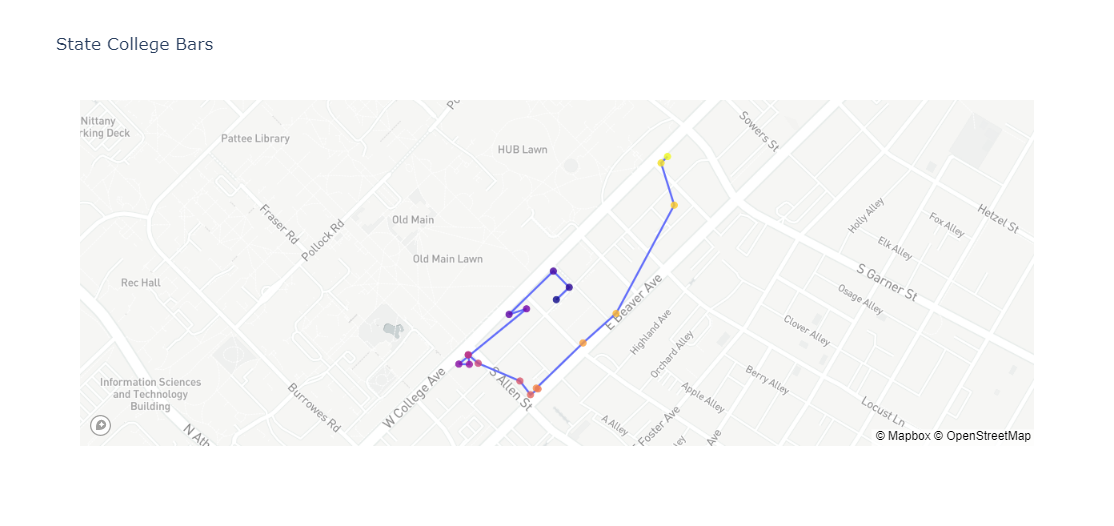

## Summary
* It is less than a mile to walk to all of the bars in State College. TSP results in a 1552 meter path. Open TSP results in a 1266 meter path

* Open TSP would be the more realistic option. Most people do not return to the starting bar for a bar crawl.

# Challenge 3 - Time to Eat
Create a new dataframe that only includes restaurants. For this challenge the Types column in bar_general **MUST** include the tag 'restaurant'.


In [26]:
bar_general.head(1)

,Place Name,Place ID,Latitude,Longitude,Rating,Types,Vicinity,coordinates,Street
0,The Shandygaff,ChIJ2wC2X5-ozokR0g8LdwFDhtA,40.795167,-77.859714,3.7,"['bar', 'point_of_interest', 'establishment']","212 E College Ave, State College",POINT (-77.85971 40.79517),E College Ave


In [31]:
# create new dataframe
rest_lst = []
for i in range(len(bar_general['Place Name'])):
  if 'restaurant' in bar_general['Types'][i]:
    rest_lst.append(i)
rest_lst

rest_df = bar_general.loc[rest_lst]
rest_df = rest_df.reset_index(drop=True) 
rest_df

,Place Name,Place ID,Latitude,Longitude,Rating,Types,Vicinity,coordinates,Street
4,Doggie's Pub,ChIJqTapLHepzokR7QDIpOfbsos,40.795018,-77.860354,4.0,"['bar', 'restaurant', 'food', 'point_of_intere...","108 S Pugh St, State College",POINT (-77.86035 40.79502),S Pugh St
7,Local Whiskey,ChIJuwJ5r5iozokRkBDMex98ww0,40.793730,-77.860145,4.4,"['bar', 'restaurant', 'food', 'point_of_intere...","107 E Beaver Ave, State College",POINT (-77.86014 40.79373),E Beaver Ave
8,Phyrst,ChIJc8UbpZiozokRXReoAANZT7g,40.793717,-77.860107,3.9,"['bar', 'restaurant', 'food', 'point_of_intere...","111 E Beaver Ave, State College",POINT (-77.86011 40.79372),E Beaver Ave
9,Champs Downtown,ChIJEesCsZiozokRZis9bSTBHtU,40.793845,-77.860495,4.2,"['bar', 'restaurant', 'food', 'point_of_intere...","139 S Allen St, State College",POINT (-77.86049 40.79384),S Allen St
10,The Tavern,ChIJbQM7Yp-ozokR-EbPyeCnEc4,40.795630,-77.859778,4.2,"['bar', 'restaurant', 'food', 'point_of_intere...","220 E College Ave, State College",POINT (-77.85978 40.79563),E College Ave
14,Primanti Bros. Restaurant and Bar State College,ChIJi53GwnBoSogR34J5rnskSFk,40.796702,-77.857185,4.1,"['bar', 'restaurant', 'food', 'point_of_intere...","130 Hiester St, State College",POINT (-77.85718 40.79670),Hiester St
16,Social Food + Drink,ChIJgYRmkF6pzokR6Gm7t-EIIm4,40.794463,-77.859141,4.4,"['restaurant', 'food', 'point_of_interest', 'e...","201 E Beaver Ave, State College",POINT (-77.85914 40.79446),E Beaver Ave
17,The Corner Room,ChIJc4r7zZiozokR-NiM1lWNeLg,40.794272,-77.861607,4.2,"['bar', 'restaurant', 'food', 'point_of_intere...","100 W College Ave, State College",POINT (-77.86161 40.79427),W College Ave
18,Allen Street Grill,ChIJc4r7zZiozokRsADin-_eEOY,40.794116,-77.861581,4.1,"['restaurant', 'food', 'point_of_interest', 'e...","100 W College Ave, State College",POINT (-77.86158 40.79412),W College Ave


## Number of Restaurants
How many of our original bars are also considered restaurants?

In [28]:
len(rest_df)

9

## Repeat
Redo either challenge 1 or challenge 2, but this time only include the locations found  in the restaurants dataframe.

If you're redoing Challenge 1, include all of the streets found in the original dataset. If a street does not have a bar that is considered a restraunt, put a 0.

## Create Distance matrix
* filter out original distance matrix to only include restraunts
- have to drop rows & columns not found

In [32]:
rest_df

,Place Name,Place ID,Latitude,Longitude,Rating,Types,Vicinity,coordinates,Street
4,Doggie's Pub,ChIJqTapLHepzokR7QDIpOfbsos,40.795018,-77.860354,4.0,"['bar', 'restaurant', 'food', 'point_of_intere...","108 S Pugh St, State College",POINT (-77.86035 40.79502),S Pugh St
7,Local Whiskey,ChIJuwJ5r5iozokRkBDMex98ww0,40.793730,-77.860145,4.4,"['bar', 'restaurant', 'food', 'point_of_intere...","107 E Beaver Ave, State College",POINT (-77.86014 40.79373),E Beaver Ave
8,Phyrst,ChIJc8UbpZiozokRXReoAANZT7g,40.793717,-77.860107,3.9,"['bar', 'restaurant', 'food', 'point_of_intere...","111 E Beaver Ave, State College",POINT (-77.86011 40.79372),E Beaver Ave
9,Champs Downtown,ChIJEesCsZiozokRZis9bSTBHtU,40.793845,-77.860495,4.2,"['bar', 'restaurant', 'food', 'point_of_intere...","139 S Allen St, State College",POINT (-77.86049 40.79384),S Allen St
10,The Tavern,ChIJbQM7Yp-ozokR-EbPyeCnEc4,40.795630,-77.859778,4.2,"['bar', 'restaurant', 'food', 'point_of_intere...","220 E College Ave, State College",POINT (-77.85978 40.79563),E College Ave
14,Primanti Bros. Restaurant and Bar State College,ChIJi53GwnBoSogR34J5rnskSFk,40.796702,-77.857185,4.1,"['bar', 'restaurant', 'food', 'point_of_intere...","130 Hiester St, State College",POINT (-77.85718 40.79670),Hiester St
16,Social Food + Drink,ChIJgYRmkF6pzokR6Gm7t-EIIm4,40.794463,-77.859141,4.4,"['restaurant', 'food', 'point_of_interest', 'e...","201 E Beaver Ave, State College",POINT (-77.85914 40.79446),E Beaver Ave
17,The Corner Room,ChIJc4r7zZiozokR-NiM1lWNeLg,40.794272,-77.861607,4.2,"['bar', 'restaurant', 'food', 'point_of_intere...","100 W College Ave, State College",POINT (-77.86161 40.79427),W College Ave
18,Allen Street Grill,ChIJc4r7zZiozokRsADin-_eEOY,40.794116,-77.861581,4.1,"['restaurant', 'food', 'point_of_interest', 'e...","100 W College Ave, State College",POINT (-77.86158 40.79412),W College Ave


### Remove unwanted rows

In [46]:
rest_distance_matrix = distance_matrix
#index values are off by one when compared to values in rest_lst
#add 1 to every value in rest_lst first
rest_distance_matrix = rest_distance_matrix.loc[[x+1 for x in rest_lst]].reset_index(drop=True) 
rest_distance_matrix

,Unnamed: 1,The Shandygaff,Adam's Apple,The Brewery,Jax Bar & Kitchen,Doggie's Pub,Bill Pickles Tap Room,Zeno's,Local Whiskey,Phyrst,Champs Downtown,The Tavern,Central Reservation,Chumley's,Alla Spina at HiWay,Primanti Bros. Restaurant and Bar State College,The Saloon,Social Food + Drink,The Corner Room,Allen Street Grill
0,Doggie's Pub,89,130,220,1,0,201,182,228,230,222,93,247,201,385,407,369,140,178,184
1,Local Whiskey,250,252,194,227,228,157,208,0,2,81,321,19,228,614,492,598,114,204,210
2,Phyrst,252,254,196,229,230,155,206,2,0,79,323,17,226,616,494,600,116,202,208
3,Champs Downtown,244,284,275,221,222,76,127,81,79,0,315,62,147,607,561,591,195,123,129
4,The Tavern,88,88,182,94,93,239,220,321,323,315,0,340,239,292,365,276,226,216,222
5,Primanti Bros. Restaurant and Bar State College,318,318,297,406,407,537,585,492,494,561,365,510,605,123,0,107,378,581,587
6,Social Food + Drink,162,138,80,139,140,271,322,114,116,195,226,133,342,500,378,484,0,318,324
7,The Corner Room,267,303,398,179,178,47,4,204,202,123,216,185,24,508,581,492,318,0,6
8,Allen Street Grill,273,309,404,185,184,53,2,210,208,129,222,191,18,514,587,498,324,6,0


### Remove unwanted columns

In [47]:
rest_names = list(rest_df['Place Name'])
rest_distance_matrix = rest_distance_matrix[rest_names]
rest_distance_matrix = np.array(rest_distance_matrix)
rest_distance_matrix

array([[  0, 228, 230, 222,  93, 407, 140, 178, 184],
       [228,   0,   2,  81, 321, 492, 114, 204, 210],
       [230,   2,   0,  79, 323, 494, 116, 202, 208],
       [222,  81,  79,   0, 315, 561, 195, 123, 129],
       [ 93, 321, 323, 315,   0, 365, 226, 216, 222],
       [407, 492, 494, 561, 365,   0, 378, 581, 587],
       [140, 114, 116, 195, 226, 378,   0, 318, 324],
       [178, 204, 202, 123, 216, 581, 318,   0,   6],
       [184, 210, 208, 129, 222, 587, 324,   6,   0]])

## TSP and Open TSP function


In [49]:
def tsp_func(dis_matrix, names, open = False):
  #only difference between TSP and Open TSP
  if open == True:
    dis_matrix[:, 0] = 0

  permutation, distance = solve_tsp_dynamic_programming(dis_matrix)

  #convert column numbers to their names
  order = []
  for i in permutation:
    order.append(names[i])

  return permutation, order, distance

### TSP

In [50]:
rest_tsp_perm, rest_tsp_ord, rest_tsp_dis = tsp_func(rest_distance_matrix, rest_names)
rest_tsp_perm, rest_tsp_ord, rest_tsp_dis

([0, 4, 5, 6, 1, 2, 3, 8, 7],
 ["Doggie's Pub",
  'The Tavern',
  'Primanti Bros. Restaurant and Bar State College',
  'Social Food + Drink',
  'Local Whiskey',
  'Phyrst',
  'Champs Downtown',
  'Allen Street Grill',
  'The Corner Room'],
 1344)

### Open TSP

In [51]:
rest_open_perm, rest_open_ord, rest_open_dis = tsp_func(rest_distance_matrix, rest_names, True)
rest_open_perm, rest_open_ord, rest_open_dis

([0, 4, 7, 8, 3, 2, 1, 6, 5],
 ["Doggie's Pub",
  'The Tavern',
  'The Corner Room',
  'Allen Street Grill',
  'Champs Downtown',
  'Phyrst',
  'Local Whiskey',
  'Social Food + Drink',
  'Primanti Bros. Restaurant and Bar State College'],
 1017)

## Visual
Create a visual of your choice. The visual should go along with the story you're trying to tell in this challenge.

### TSP Map

In [55]:
tsp_map(rest_tsp_ord, rest_df)

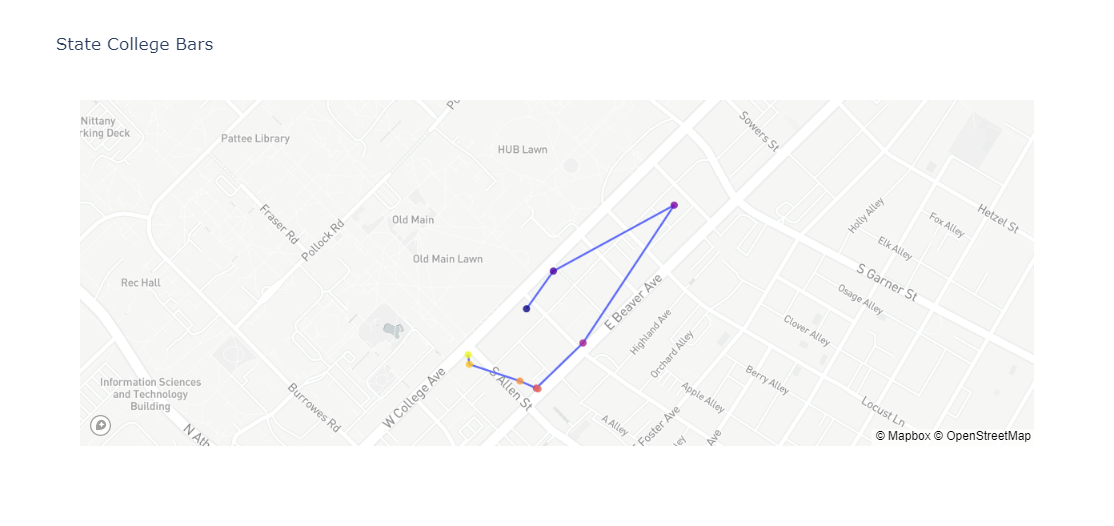

### Open TSP Map

In [53]:
tsp_map(rest_open_ord, rest_df)

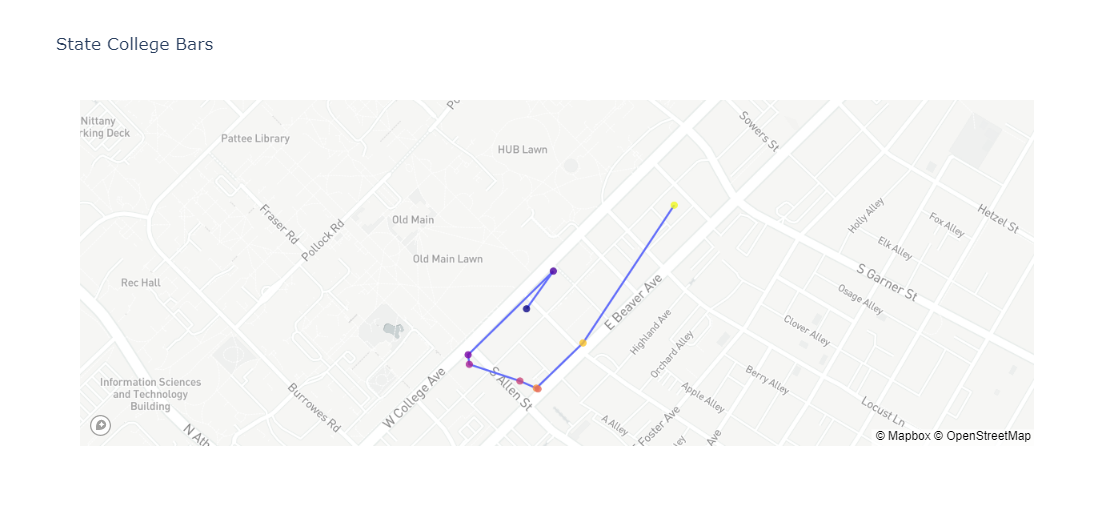